In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
event_data = pd.read_csv('/Users/cram/Downloads/event_data_train.csv')

In [6]:
submissions_data = pd.read_csv('/Users/cram/Downloads/submissions_data_train.csv')

In [7]:
event_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [8]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [9]:
event_data['data']=pd.to_datetime(event_data.timestamp, unit = 's')

In [10]:
event_data['data'].head()

0   2015-06-15 04:00:48
1   2015-06-15 04:00:48
2   2015-06-15 04:00:48
3   2015-06-15 04:01:35
4   2015-06-15 04:01:35
Name: data, dtype: datetime64[ns]

In [11]:
event_data.head(10)

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [12]:
event_data['data'].max()

Timestamp('2018-05-19 23:33:31')

In [13]:
event_data['data'].min()

Timestamp('2015-06-15 04:00:48')

In [14]:
event_data['day'] = event_data.data.dt.date

<AxesSubplot:xlabel='day'>

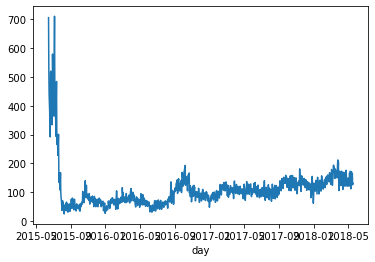

In [15]:
event_data.groupby('day').user_id.nunique().plot()

In [16]:
#event_data[event_data.action == 'passed'] \
#.groupby('user_id', as_index = False) \
#.agg({'step_id':'count'})\
#.rename(columns = {'step_id':'passed_steps'}).passed_steps.min()


In [17]:
event_data.pivot_table(index = 'user_id', 
                       columns = 'action', 
                       values = 'step_id', 
                       aggfunc = 'count',
                       fill_value = 0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [18]:
submissions_data['data']=pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = event_data.data.dt.date

In [19]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id,data,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2015-06-15
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2015-06-15
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-15


In [20]:

users_scores = submissions_data.pivot_table(index = 'user_id', 
                                           columns = 'submission_status', 
                                           values = 'step_id', 
                                           aggfunc = 'count',
                                           fill_value = 0).reset_index()

In [21]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [22]:
gape_data = event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).values

In [23]:
gape_data = pd.Series(np.concatenate(gape_data, axis = 0))

In [24]:
gape_data =  gape_data / (24*60*60)

In [25]:
gape_data #значения разницы между 2 днями захода на курс в секундах

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

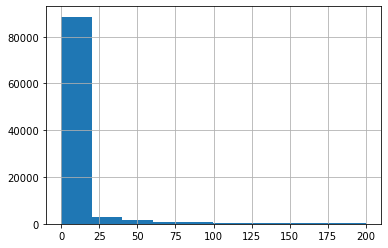

In [26]:
gape_data[gape_data < 200].hist()

In [27]:
gape_data.quantile(0.95)

59.760440972222156

In [28]:
 ssss = event_data.pivot_table(columns = 'user_id', values = 'step_id',aggfunc = 'count')

In [29]:
ssss

user_id,1,2,3,5,7,8,9,11,14,16,...,26784,26786,26787,26788,26789,26790,26793,26794,26797,26798
step_id,2,30,400,38,3,386,10,3,17,1151,...,1046,195,65,3,6,26,3,352,35,39


In [30]:
event_data.sort_values(['step_id'], ascending=[False]).groupby('step_id')

In [31]:
submissions_data

,step_id,timestamp,submission_status,user_id,data,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2015-06-15
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2015-07-11
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2015-07-11
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2015-07-11
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2015-07-11


In [32]:
 eee = submissions_data[submissions_data.submission_status == 'correct'] \
    .sort_values(by='step_id', ascending=False) \
.drop_duplicates('user_id')

In [33]:
ddd = event_data[event_data.action == 'passed'] \
.sort_values(by='step_id', ascending=False) \
.drop_duplicates('user_id')

In [34]:
event_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [35]:
users_data = event_data.groupby('user_id', as_index = False) \
.agg({'timestamp':'max'}).rename(columns = {'timestamp':'last_timestamp'})

In [36]:
now = 1526772811
drop_out = 24*60*60*30

In [37]:
users_data['is_gone_users'] = (now - users_data.last_timestamp) > drop_out

In [38]:
users_data.head()

,user_id,last_timestamp,is_gone_users
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [39]:
users_data.merge(users_scores, how = 'outer').head()

,user_id,last_timestamp,is_gone_users,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [40]:
c = submissions_data[submissions_data.submission_status == 'correct'].groupby('user_id').agg({'submission_status': 'count'}).sort_values(by=['submission_status'], ascending=False).head(20)
print(c)

         submission_status
user_id                   
1046                   421
5552                   186
17135                  168
6183                   142
8461                   135
1218                   130
24022                  121
14699                  121
30                     119
22713                  117
12470                  115
3572                   113
26417                  111
16271                  107
19755                  107
15274                  102
9873                   102
20531                  101
19691                  100
11329                   99


In [41]:
x = [0, 4, 7, 6, 7, 8]
y = [1, 2, 0, 0, 0, 0]
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=-0.18461538461538463, intercept=1.4846153846153847, rvalue=-0.6495983543529202, pvalue=0.16266058279563134, stderr=0.1080351685014472, intercept_stderr=0.6452030550520669)

In [42]:
np.corrcoef(x,y)

array([[ 1.        , -0.64959835],
       [-0.64959835,  1.        ]])

In [82]:
events_data = pd.read_csv('/Users/cram/Downloads/event_data_train.csv')
submission_data = pd.read_csv('/Users/cram/Downloads/submissions_data_train.csv')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170

In [83]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [87]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'min'}).rename(columns ={'timestamp':'min_timestamp'})

In [88]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [89]:
users_data = users_data.merge(user_min_time, how='outer')

In [90]:
users_data['min+3days'] = users_data.min_timestamp + 3*60*60*24

In [91]:
users_data_new = users_data[['user_id', 'min+3days']]

In [92]:
users_data_new

,user_id,min+3days
0,1,1473086664
1,2,1514642564
2,3,1434617676
3,5,1466416009
4,7,1521893860
...,...,...
19229,26790,1451743216
19230,26793,1510484231
19231,26794,1495546249
19232,26797,1508684516


In [95]:
events_data_new = events_data.merge(users_data_new, on = 'user_id', how = 'outer')

In [97]:
events_data_new_days = events_data_new[events_data_new['timestamp']<events_data_new['min+3days']]

In [98]:
events_data_new_days

,step_id,timestamp,action,user_id,date,day,min+3days
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434600048
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1527031950


In [101]:
submission_data = pd.read_csv('/Users/cram/Downloads/submissions_data_train.csv')

In [122]:
submissions_data

,step_id,timestamp_x,submission_status,user_id,data,day,timestamp_y,timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1479734163,1479734163
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1479734163,1479734163
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2015-06-15,1479734163,1479734163
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2015-06-15,1479734163,1479734163
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1479734163,1479734163
...,...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2015-07-11,1501946959,1501946959
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2015-07-11,1503059927,1503059927
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2015-07-11,1506348153,1506348153
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2015-07-11,1523035316,1523035316


In [123]:
max_time = submissions_data.groupby('user_id', as_index=False) \
.agg({'timestamp': 'max'}) \
.rename(columns ={'timestamp':'max_timestamp'})

In [124]:
submissions_data = submissions_data.merge(max_time, on = 'user_id', how = 'outer')

In [125]:
submissions_data

,step_id,timestamp_x,submission_status,user_id,data,day,timestamp_y,timestamp,max_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1479734163,1479734163,1479734163
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1479734163,1479734163,1479734163
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2015-06-15,1479734163,1479734163,1479734163
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2015-06-15,1479734163,1479734163,1479734163
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1479734163,1479734163,1479734163
...,...,...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2015-07-11,1501946959,1501946959,1501946959
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2015-07-11,1503059927,1503059927,1503059927
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2015-07-11,1506348153,1506348153,1506348153
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2015-07-11,1523035316,1523035316,1523035316


In [127]:
submissions_data_new = submissions_data[submissions_data['timestamp']==submissions_data['max_timestamp']]

In [135]:
submissions_data_new2 = submissions_data_new[submissions_data_new['submission_status']== 'wrong']

In [138]:
submissions_data_new2

,step_id,timestamp_x,submission_status,user_id,data,day,timestamp_y,timestamp,max_timestamp
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2015-06-15,1479734163,1479734163,1479734163
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1479734163,1479734163,1479734163
15,32031,1434363465,wrong,15853,2015-06-15 10:17:45,2015-06-15,1479734163,1479734163,1479734163
33,32795,1434520465,wrong,15853,2015-06-17 05:54:25,2015-06-15,1479734163,1479734163,1479734163
38,32812,1434346160,wrong,15853,2015-06-15 05:29:20,2015-06-15,1479734163,1479734163,1479734163
...,...,...,...,...,...,...,...,...,...
509096,120745,1500154509,wrong,3310,2017-07-15 21:35:09,2015-07-11,1500154533,1500154533,1500154533
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2015-07-11,1501946959,1501946959,1501946959
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2015-07-11,1506348153,1506348153,1506348153
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2015-07-11,1523035316,1523035316,1523035316


In [139]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
data[data.submission_status == "wrong"].groupby(['user_id', 'step_id'], as_index=False).agg({'timestamp':'max'}).step_id.value_counts().keys()[0]

31978